# Caso de uso del Análisis de Datos

En este estudio vamos a analizar el conjunto de datos para la calidad del aire descrito en http://archive.ics.uci.edu/ml/datasets/Air+Quality.

Comenzaremos por importar los datos, y hacer algunas gráficas para ver el comportamiento de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Vamos a cargar los datos en un `DataFrame` desde el archivo `csv` ubicado en la computadora o directo del servidor.

In [65]:
df = pd.read_csv("http://badillosoft.com/air_quality.csv", sep=";")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB
None


## Pre-procesamiento de datos

En pre-prepocesamiento de datos, vamos a generar como resultado un objeto de análisis limpio y entendible (manejable), dónde busquemos que los datos del análisis estén correctamente estructurados, formateados y organizados.

Algunas columnas como la columna `CO(GT)` tiene valores numéricos en un formato estándar holandés del tipo `x,y` para referirse al numéro `x.y`, por lo que vamos a aplicar un mapeo que reemplace la `,` por `.` y convierta la cadena a flotante.

In [66]:
from time import strptime

def clear_format(s):
    return float(str(s).replace(",", "."))

def time_format(t):
    try:
        return strptime(str(t), "%H.%M.%S")[3]
    except:
        return t

#df["X"] = df["X"].map(lambda s: float(str(s).replace(",", ".")))
df["CO(GT)"] = df["CO(GT)"].map(clear_format)
df["T"] = df["T"].map(clear_format)
df["RH"] = df["RH"].map(clear_format)
df["AH"] = df["AH"].map(clear_format)

df["Time"] = df["Time"].map(time_format)

In [36]:
print(df.head())

         Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.0     2.6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.0     2.0       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.0     2.2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.0     2.2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.0     1.6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  Unnamed: 15  Unnamed: 16  
0  0.7578          NaN          NaN 

Para un primer análisis es útil generar un `DataFrame` más limpio, que contenga sólo las columnas utilizadas en el análisis, de esta forma podremos apreciar los datos que serán utilizados para el análisis de forma clara y sin tener conflicto con otras columnas que pudieran tener datos malformados.

In [67]:
df_co = pd.DataFrame(df, columns=["Date", "Time", "CO(GT)", "T", "RH", "AH"])

print(df_co.head())
print(df_co.tail())

         Date  Time  CO(GT)     T    RH      AH
0  10/03/2004  18.0     2.6  13.6  48.9  0.7578
1  10/03/2004  19.0     2.0  13.3  47.7  0.7255
2  10/03/2004  20.0     2.2  11.9  54.0  0.7502
3  10/03/2004  21.0     2.2  11.0  60.0  0.7867
4  10/03/2004  22.0     1.6  11.2  59.6  0.7888
     Date  Time  CO(GT)   T  RH  AH
9466  NaN   NaN     NaN NaN NaN NaN
9467  NaN   NaN     NaN NaN NaN NaN
9468  NaN   NaN     NaN NaN NaN NaN
9469  NaN   NaN     NaN NaN NaN NaN
9470  NaN   NaN     NaN NaN NaN NaN


Vamos a quitar los `NaN` del `DataFrame` del análisis (`df_co`).

In [68]:
df_co = df_co.dropna()
df_co["CO"] = df_co["CO(GT)"]
del df_co["CO(GT)"]
df_co = df_co.query("CO >= 0")

print(df_co.head())
print(df_co.tail())

         Date  Time     T    RH      AH   CO
0  10/03/2004  18.0  13.6  48.9  0.7578  2.6
1  10/03/2004  19.0  13.3  47.7  0.7255  2.0
2  10/03/2004  20.0  11.9  54.0  0.7502  2.2
3  10/03/2004  21.0  11.0  60.0  0.7867  2.2
4  10/03/2004  22.0  11.2  59.6  0.7888  1.6
            Date  Time     T    RH      AH   CO
9352  04/04/2005  10.0  21.9  29.3  0.7568  3.1
9353  04/04/2005  11.0  24.3  23.7  0.7119  2.4
9354  04/04/2005  12.0  26.9  18.3  0.6406  2.4
9355  04/04/2005  13.0  28.3  13.5  0.5139  2.1
9356  04/04/2005  14.0  28.5  13.1  0.5028  2.2


## Procesamiento de Datos

En el procesamiento de datos, ya poseemos una estructura de datos limpia y manejable, de la cuál podemos empezar a buscar y generar datos, por ejemplo, promedios, máximos, mínimos, desviaciones estándar, correlaciones, indicadores, validar modelos, etc.

Vamos a trabajar nuestro objeto limpio llamado `df_co`. Lo primero que necesitamos en ver como se distribuyen los datos a lo largo del tiempo. Podemos entonces, agrupar los datos por hora, de esta manera podremos generar una gráfica de como se distribuyen los niveles de `CO` para cada hora específica. Lo mismo para la temperatura y la humedad.

In [74]:
n = len(df_co["CO"])
min_co = min(df_co["CO"])
max_co = max(df_co["CO"])
sum_co = sum(df_co["CO"])
avg_co = sum_co / n
df_co["CO_diff"] = df_co["CO"].map(lambda co: (co - avg_co) ** 2)
sum2_co = sum(df_co["CO_diff"])
ds_co = (sum2_co / (n - 1)) ** 0.5

print("Reporte general de la concentración de CO")
print("Mediciones: {}".format(n))
print("Mínimo: {}".format(min_co))
print("Máximo: {}".format(max_co))
print("Promedio: {}".format(avg_co))
print("Desviación Estándar: {}".format(ds_co))

Reporte general de la concentración de CO
Mediciones: 7674
Mínimo: 0.1
Máximo: 11.9
Promedio: 2.1527495439145157
Desviación Estándar: 1.4532520363373336


In [75]:
df_co_t0 = df_co.query("Time == 0")

n = len(df_co_t0["CO"])
min_co = min(df_co_t0["CO"])
max_co = max(df_co_t0["CO"])
sum_co = sum(df_co_t0["CO"])
avg_co = sum_co / n
sum2_co = sum(df_co_t0["CO_diff"])
ds_co = (sum2_co / (n - 1)) ** 0.5

print("Reporte de la concentración de CO a las 0 horas")
print("Mediciones: {}".format(n))
print("Mínimo: {}".format(min_co))
print("Máximo: {}".format(max_co))
print("Promedio: {}".format(avg_co))
print("Desviación Estándar: {}".format(ds_co))

Reporte de la concentración de CO a las 0 horas
Mediciones: 329
Mínimo: 0.1
Máximo: 5.9
Promedio: 1.7860182370820665
Desviación Estándar: 0.953944799185313


In [86]:
co_reporte = []

def reporte_co_ti(ti):
    df_co_ti = df_co.query("Time == {}".format(ti))

    n = len(df_co_ti["CO"])
    min_co = min(df_co_ti["CO"])
    max_co = max(df_co_ti["CO"])
    sum_co = sum(df_co_ti["CO"])
    avg_co = sum_co / n
    sum2_co = sum(df_co_ti["CO_diff"])
    ds_co = (sum2_co / (n - 1)) ** 0.5
    
    co_reporte.append({
        "ti": ti,
        "min": min_co,
        "max": max_co,
        "avg": avg_co,
        "ds": ds_co
    })

    print("Reporte de la concentración de CO a las {} horas".format(ti))
    print("Mediciones: {}".format(n))
    print("Mínimo: {}".format(min_co))
    print("Máximo: {}".format(max_co))
    print("Promedio: {}".format(avg_co))
    print("Desviación Estándar: {}".format(ds_co))

In [80]:
reporte_co_ti(18)

Reporte de la concentración de CO a las 18 horas
Mediciones: 333
Mínimo: 0.1
Máximo: 10.2
Promedio: 3.4363363363363395
Desviación Estándar: 2.2906827277153115


In [87]:
for ti in range(0, 24):
    reporte_co_ti(ti)
    print("-" * 60)

Reporte de la concentración de CO a las 0 horas
Mediciones: 329
Mínimo: 0.1
Máximo: 5.9
Promedio: 1.7860182370820665
Desviación Estándar: 0.953944799185313
------------------------------------------------------------
Reporte de la concentración de CO a las 1 horas
Mediciones: 323
Mínimo: 0.1
Máximo: 5.6
Promedio: 1.4678018575851395
Desviación Estándar: 1.0490481723694742
------------------------------------------------------------
Reporte de la concentración de CO a las 2 horas
Mediciones: 320
Mínimo: 0.1
Máximo: 5.5
Promedio: 1.0990624999999998
Desviación Estándar: 1.268390437642035
------------------------------------------------------------
Reporte de la concentración de CO a las 3 horas
Mediciones: 312
Mínimo: 0.1
Máximo: 5.2
Promedio: 0.8884615384615387
Desviación Estándar: 1.4049599777880741
------------------------------------------------------------
Reporte de la concentración de CO a las 4 horas
Mediciones: 179
Mínimo: 0.1
Máximo: 2.8
Promedio: 0.7586592178770949
Desviación Es

In [90]:
df_co_reporte = pd.DataFrame(co_reporte)
print(df_co_reporte)

         avg        ds   max  min  ti
0   1.786018  0.953945   5.9  0.1   0
1   1.467802  1.049048   5.6  0.1   1
2   1.099062  1.268390   5.5  0.1   2
3   0.888462  1.404960   5.2  0.1   3
4   0.758659  1.480659   2.8  0.1   4
5   0.712934  1.493742   2.9  0.1   5
6   0.921562  1.308382   3.5  0.1   6
7   1.810903  1.222016   5.7  0.1   7
8   2.823750  1.650531   7.3  0.1   8
9   2.972477  1.756129   8.1  0.1   9
10  2.565749  1.342364   6.6  0.2  10
11  2.260923  1.081090   6.6  0.1  11
12  2.169632  0.989051   6.0  0.1  12
13  2.201227  1.119073   6.9  0.1  13
14  2.126074  1.213539   7.9  0.1  14
15  2.049231  1.089789   6.1  0.1  15
16  2.267477  1.197167   7.1  0.2  16
17  2.816314  1.696839   8.4  0.3  17
18  3.436336  2.290683  10.2  0.1  18
19  3.733234  2.414750  11.9  0.4  19
20  3.469069  2.184543  11.5  0.7  20
21  2.600904  1.412984   8.6  0.3  21
22  1.976970  0.897754   5.4  0.1  22
23  1.877508  0.894424   5.4  0.1  23


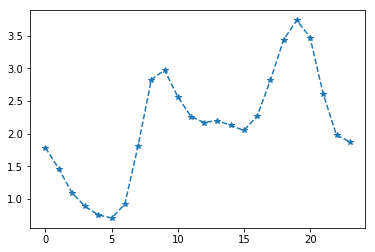

In [94]:
plt.plot(df_co_reporte["ti"], df_co_reporte["avg"], "*--")

plt.show()

In [160]:
from math import sin, cos, pi

def modelo_co(t, a, b, w1, w2, p1, p2, bias):
    return a * sin(w1 * t + p1) + b * cos(w2 * t + p2) + bias

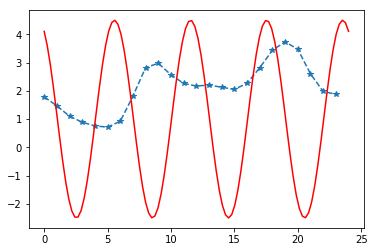

In [161]:
a = 1
b = 2.5
w1 = pi / 3
w2 = pi / 3
p1 = 2
p2 = 0.5
bias = 1

t = np.linspace(0, 24, 100)
y = [modelo_co(ti, a, b, w1, w2, p1, p2, bias) for ti in t]

plt.plot(df_co_reporte["ti"], df_co_reporte["avg"], "*--")
plt.plot(t, y, color="red")

plt.show()

Step 0: 124.08844801728652
Step 1000: 10.346827168220669
Step 2000: 10.346827168220669
Step 3000: 7.673948788990888
Step 4000: 7.673948788990888
Step 5000: 7.673948788990888
Step 6000: 7.673948788990888
Step 7000: 7.673948788990888
Step 8000: 7.673948788990888
Step 9000: 7.673948788990888


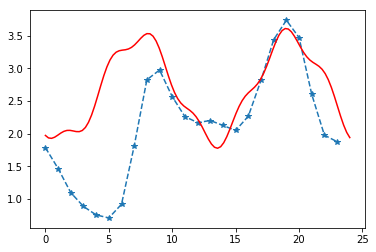

In [164]:
import random

def optimizador_co():
    a = 0
    b = 0
    w1 = 0
    w2 = 0
    p1 = 0
    p2 = 0
    bias = 0
    
    berr = 10 ** 100
    ba = a
    bb = b
    bw1 = w1
    bw2 = w2
    bp1 = p1
    bp2 = p2
    bbias = bias
    
    gerr = berr
    ga = a
    gb = b
    gw1 = w1
    gw2 = w2
    gp1 = p1
    gp2 = p2
    gbias = bias
    
    for step in range(10000):
        err = 0
        for i in range(len(df_co_reporte)):
            ti = df_co_reporte["ti"][i]
            ye = df_co_reporte["avg"][i]
            y = modelo_co(ti, a, b, w1, w2, p1, p2, bias)
            err += (y - ye) ** 2
            a += (2 * random.random() - 1) / 10
            b += (2 * random.random() - 1) / 10
            w1 += (2 * random.random() - 1) / 10
            w2 += (2 * random.random() - 1) / 10
            p1 += (2 * random.random() - 1) / 10
            p2 += (2 * random.random() - 1) / 10
            bias += (2 * random.random() - 1) / 10
        if err < berr:
            berr = err
            ba = a
            bb = b
            bw1 = w1
            bw2 = w2
            bp1 = p1
            bp2 = p2
            bbias = bias
        if berr < gerr:
            gerr = berr
            ga = ba
            gb = bb
            gw1 = bw1
            gw2 = bw2
            gp1 = bp1
            gp2 = bp2
            gbias = bbias
        a = ba
        b = bb
        w1 = bw1
        w2 = bw2
        p1 = bp1
        p2 = bp2
        bias = bbias
        if step % 1000 == 0:
            print("Step {}: {}".format(step, gerr))
            
    t = np.linspace(0, 24, 100)
    y = [modelo_co(ti, ga, gb, gw1, gw2, gp1, gp2, bias) for ti in t]

    plt.plot(df_co_reporte["ti"], df_co_reporte["avg"], "*--")
    plt.plot(t, y, color="red")

    plt.show()
        
optimizador_co()

In [153]:
f = open("reporte_co.csv", "w")

f.write(df_co_reporte.to_csv())

f.close()

In [155]:
with open("co.csv", "w") as f:
    f.write(df_co.to_csv())